In [1]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
x = wine.data
y = wine.target
x.shape, y.shape # 데이터의 수가 적기에 validation을 작게 잡는다

((178, 13), (178,))

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
y = to_categorical(y, 3)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [42]:
tf.keras.backend.clear_session()
il = tf.keras.layers.Input(shape=(13,), name='INputLayer')
hl1 = Dense(256, activation='relu')(il)
hl2 = Dense(256, activation='relu')(hl1)
hl3 = Dense(256, activation='relu')(hl2)
ol = Dense(3, activation='softmax')(hl3)
model = tf.keras.models.Model(inputs=il ,outputs=ol)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INputLayer (InputLayer)     [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 135,939
Trainable params: 135,939
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=7,
                   verbose=1,
                   restore_best_weights=True)

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, callbacks=[es],epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 61ms/step - loss: 0.8747 - accuracy: 0.7244 - val_loss: 0.5527 - val_accuracy: 0.9333
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.3789 - accuracy: 0.9921 - val_loss: 0.2499 - val_accuracy: 0.9333
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1447 - accuracy: 0.9843 - val_loss: 0.1209 - val_accuracy: 0.9333
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9921 - val_loss: 0.0798 - val_accuracy: 0.9333
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.9843 - val_loss: 0.0581 - val_accuracy: 0.9333
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0215 - accuracy: 0.9921 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 8/50
4/4 [===========

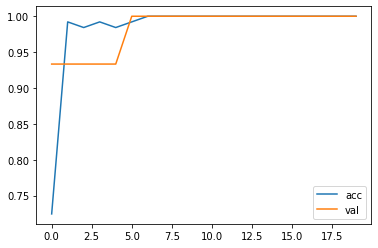

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val'])
plt.show()

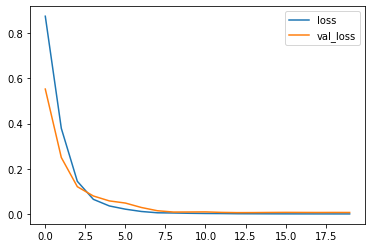

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [46]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 4.2364e-04 - accuracy: 1.0000


[0.0004236389650031924, 1.0]

In [47]:
from sklearn.metrics import *
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[2.0910156e-05, 9.9997777e-01, 1.2801428e-06],
       [5.3095018e-06, 9.9999303e-01, 1.5445859e-06],
       [9.9999994e-01, 2.2063331e-08, 1.4102498e-08],
       [1.8451135e-06, 9.9999791e-01, 1.9118355e-07],
       [3.8393463e-07, 4.6375339e-04, 9.9953592e-01]], dtype=float32)

In [48]:
y_test[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [49]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

1.0

In [50]:
import pandas as pd
pd.DataFrame(X_train, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02
mean,9.335490e-15,6.560806e-16,2.559742e-15,-4.108699e-16,3.251992e-16,-2.395284e-16,-4.056248e-16,-5.272467e-16,1.056023e-15,-1.757125e-16,9.213977e-16,-1.236981e-15,7.671029e-17
std,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00
min,-1.993332e+00,-1.383997e+00,-3.494968e+00,-2.480546e+00,-2.139697e+00,-2.055225e+00,-1.626230e+00,-1.865278e+00,-1.980575e+00,-1.673413e+00,-2.138480e+00,-1.840518e+00,-1.547127e+00
25%,-8.172139e-01,-6.345261e-01,-5.561785e-01,-6.745735e-01,-8.321996e-01,-8.839202e-01,-9.013218e-01,-7.789944e-01,-6.017396e-01,-8.084476e-01,-7.398289e-01,-9.299930e-01,-7.867005e-01
50%,5.861872e-02,-4.006148e-01,-3.756859e-02,-1.102070e-01,-1.058123e-01,8.435855e-02,1.135500e-01,-1.755034e-01,-5.856186e-02,-1.845730e-01,8.160109e-02,2.618319e-01,-2.597525e-01
75%,8.155883e-01,5.063880e-01,7.403463e-01,5.952511e-01,5.479362e-01,7.871415e-01,8.432910e-01,7.096167e-01,5.932514e-01,5.302393e-01,7.254246e-01,8.540431e-01,7.941435e-01
max,2.285736e+00,3.303776e+00,2.970369e+00,2.993809e+00,4.543066e+00,2.473820e+00,2.955191e+00,2.157995e+00,3.317497e+00,3.283747e+00,2.168477e+00,2.112492e+00,2.999218e+00
